In [1]:
import random

## Importance of Asset allocation  

### Game Rule  
 - Coin head: 100% return  
 - Coin tail: -50% return  

### Portfolio (betting rule)  
 - All in: Bet all money  
 - Allocation: Bet N ratio of total money

In [2]:
N=50 # Rebalancing

In [3]:
# Portfolio1: All in 
Seed = 100
ts_Seed=[]
pos_ratio= 100
neg_ratio = 50
mem=[]
ts_Cumulative_Return=[]
Cumulative_Return=0

for i in range(N):
    if random.randint(1,2) == 1:
        return_v1 = Seed * pos_ratio/100.
        Seed += return_v1
        Cumulative_Return += return_v1
        
        ts_Cumulative_Return.append(Cumulative_Return)
        mem.append(1)
        ts_Seed.append(Seed)
        
    else:
        return_v1 = -1 * Seed * neg_ratio / 100.
        Seed += return_v1
        Cumulative_Return += return_v1
        
        ts_Cumulative_Return.append(Cumulative_Return)
        mem.append(0)
        ts_Seed.append(Seed)

In [4]:
# Portfolio2: Allocate 50% 
Seed_v2 = 100
ts_Seed_v2=[]
mem_v2=[]
alloc_ratio = 0.5
ts_Cumulative_Return_v2=[]
Cumulative_Return_v2=0

for i in range(N):
    
    if random.randint(1,2) == 1:
        
        invest_seed = Seed_v2 * alloc_ratio
        rest_seed   = Seed_v2 * (1 - alloc_ratio)
        
        return_v2 = invest_seed * pos_ratio /100.
        invest_seed += return_v2
        Cumulative_Return_v2 += return_v2
        Seed_v2 = invest_seed + rest_seed
        
        mem_v2.append(1)
        ts_Cumulative_Return_v2.append(Cumulative_Return_v2)
        ts_Seed_v2.append(Seed_v2)
        
    else:
        
        invest_seed = Seed_v2 * alloc_ratio
        rest_seed   = Seed_v2 * (1 - alloc_ratio)
        
        return_v2 = -1 * invest_seed * neg_ratio / 100
        invest_seed += return_v2
        Cumulative_Return_v2 += return_v2
        Seed_v2 = invest_seed + rest_seed
        
        mem_v2.append(0)
        ts_Cumulative_Return_v2.append(Cumulative_Return_v2)
        ts_Seed_v2.append(Seed_v2)

In [5]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

(array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

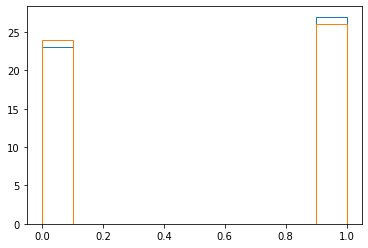

In [6]:
# Check probability
plt.hist(mem,histtype="step")
plt.hist(mem_v2,histtype="step")

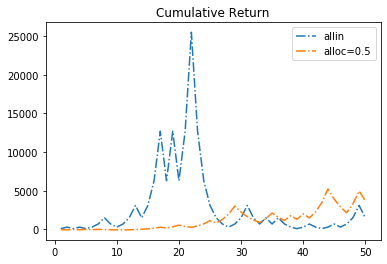

In [7]:

import numpy as np
plt.close()
plt.title("Cumulative Return")
plt.plot(np.arange(N)+1,ts_Cumulative_Return,"-.",label="allin")
plt.plot(np.arange(N)+1,ts_Cumulative_Return_v2,"-.",label="alloc=0.5")
plt.legend()


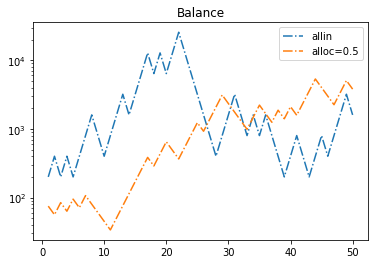

In [8]:
plt.close()
plt.title("Balance")
plt.plot(np.arange(N)+1,ts_Seed,"-.",label="allin")
plt.plot(np.arange(N)+1,ts_Seed_v2,"-.",label="alloc=0.5")
plt.yscale("log")
plt.legend()

In [16]:
arr_CR = np.array(ts_Cumulative_Return)
arr_CR_v2 = np.array(ts_Cumulative_Return_v2)

In [24]:
# Standard deviation
print("Risk Allin: ",arr_CR.std())
print("RisK Alloc: ",arr_CR_v2.std())

Risk Allin:  4734.839384815497
RisK Alloc:  1376.7230331435635


In [20]:
# Fittness
print("Fitness Allin: ",(arr_CR[-1]) / arr_CR.std())
print("Fitness Alloc: ",(arr_CR_v2[-1]) / arr_CR_v2.std())

Fitness Allin:  0.31680060886763334
Fitness Alloc:  2.6879192205358575
